# Практическое задание 5
## Вариант 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.cluster import hierarchy

### Задание 1 (v 7)

In [2]:
k=2
D = [[9.1, -15.6], [13.5, -29.7], [0.7, -12.2], [-4.0, -20.5], [13.0, -25.7],[9.6, -24.1], [9.8, -27.1],
     [0.7, -15.2],[2.7,-14.0],[9.8,-29.2]]
U_init = [[4.0, -25.0], [2.0, -10.0]]
e=0.01
print('Source data D',D)
print('Clusters count',k)
print('Init centers: U_init =',U_init)
print('Epsilon:',e)

Source data D [[9.1, -15.6], [13.5, -29.7], [0.7, -12.2], [-4.0, -20.5], [13.0, -25.7], [9.6, -24.1], [9.8, -27.1], [0.7, -15.2], [2.7, -14.0], [9.8, -29.2]]
Clusters count 2
Init centers: U_init = [[4.0, -25.0], [2.0, -10.0]]
Epsilon: 0.01


In [3]:
def recalc_centroids(cluster):
    centroid=[]
    temp_1=0
    temp_2=0
    len_cluster=len(cluster)
    for coordinate_1,coordinate_2 in cluster:
        temp_1+=coordinate_1
        temp_2+=coordinate_2
    centroid.append(temp_1/len_cluster)
    centroid.append(temp_2/len_cluster)
    return centroid

def calc_distance(coordinate_1,coordinate_2):
    return (coordinate_1[0]-coordinate_2[0])**2+(coordinate_1[1]-coordinate_2[1])**2

def cluster_index(D,cluster):
    return [D.index(coordinate) for coordinate in cluster]

def run_Kmeans(U_init,D,e):  
    U_new=U_init
    first_thr=1
    second_thr=1
    cluster=[]
    while first_thr>e or second_thr>e:
        cluster=[]
        first_cluster=[]
        second_cluster=[]
        for coordinate in D:
            first_distance=calc_distance(U_new[0],coordinate)
            second_distance=calc_distance(U_new[1],coordinate)
            if first_distance<=second_distance:
                first_cluster.append(coordinate)
            else: 
                second_cluster.append(coordinate)
        U_old=U_new.copy()
        U_new[0]=recalc_centroids(first_cluster)
        U_new[1]=recalc_centroids(second_cluster)
        first_thr =calc_distance(U_old[0],U_new[0])
        second_thr=calc_distance(U_old[1],U_new[1])
        cluster.append(cluster_index(D,first_cluster))
        cluster.append(cluster_index(D,second_cluster))
    return U_new,cluster

In [4]:
print('1.1')
U,clusters=run_Kmeans(U_init,D,e)
print('Clusters:',clusters)
print('New centers:',U)

1.1
Clusters: [[1, 4, 5, 6, 9], [0, 2, 3, 7, 8]]
New centers: [[11.14, -27.159999999999997], [1.8399999999999999, -15.5]]


In [5]:
def make_plot(U,D,clusters):
    D=np.array(D)
    fig, ax = plt.subplots()
    for i,coordinate in enumerate(U):
        ax.plot(coordinate[0],coordinate[1],'r*')
        ax.text(coordinate[0]+0.1,coordinate[1]-0.1,'Center'+str(i))
    labels_=[0]*len(D)
    for index in clusters[1]:
        labels_[index]=1
    for cluster in clusters:
        for index in cluster:
            ax.text(D[index,0]+0.01,D[index,1]+0.1,index)
    scatter = ax.scatter(D[:,0],D[:,1],c=labels_,cmap='rainbow')
    legend = ax.legend(*scatter.legend_elements(fmt='Cluster {x:.0f}'),bbox_to_anchor=(1,0.7))
    ax.add_artist(legend)
    plt.show()

1.2


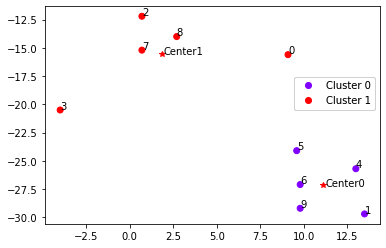

In [6]:
print('1.2')
make_plot(U,D,clusters)

In [7]:
print('1.3')
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(D))
print('KMean labels:',kmeans.labels_)
print('KMean cluster centers:',kmeans.cluster_centers_)

1.3
KMean labels: [1 0 1 1 0 0 0 1 1 0]
KMean cluster centers: [[ 11.14 -27.16]
 [  1.84 -15.5 ]]


1.4
Add point [24, -6] to D
Clusters: [[1, 3, 4, 5, 6, 9], [0, 2, 7, 8, 10]]
New centers: [[8.616666666666667, -26.049999999999997], [7.44, -12.6]]


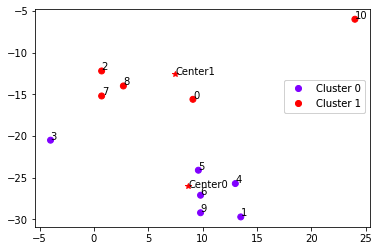

In [8]:
print('1.4')
new=[24,-6]
D.append(new)
print(f'Add point {new} to D')
U_init = [[4.0, -25.0], [2.0, -10.0]]
U,clusters=run_Kmeans(U_init,D,e)
print('Clusters:',clusters)
print('New centers:',U)
make_plot(U,D,clusters)

### Задание 2 (v 7)

In [9]:
x = [4.7,12.1,18,10.3,11.7,11.6,12.4,15.7,13.4,20.6]
P= [[1,0.6,0.2,0.8,0.7,0.7,0.6,0.3,0.5,0.1], [0,0.4,0.8,0.2,0.3,0.3,0.4,0.7,0.5,0.9]]
print('Source data x:',x)
print('P(Ci|x):',P)

Source data x: [4.7, 12.1, 18, 10.3, 11.7, 11.6, 12.4, 15.7, 13.4, 20.6]
P(Ci|x): [[1, 0.6, 0.2, 0.8, 0.7, 0.7, 0.6, 0.3, 0.5, 0.1], [0, 0.4, 0.8, 0.2, 0.3, 0.3, 0.4, 0.7, 0.5, 0.9]]


In [10]:
print('2.1')
def calc_estimate_mean(x,P):
    est_1=0
    est_2=0
    for var,prob_1,prob_2 in zip(x,P[0],P[1]):
        est_1+=var*prob_1
        est_2+=var*prob_2
    est_1/=np.sum(P[0])
    est_2/=np.sum(P[1])
    return [round(est_1,2),round(est_2,2)]
estimate=calc_estimate_mean(x,P)
print(f'Result u1 and u2:',estimate)

2.1
Result u1 and u2: [11.09, 15.44]


In [11]:
print('2.2')
x=12.6
u=[11,17.9]
sd=[4.6,3.9]
P_a=[0.4,0.6]
print('New point value:',x)
print('Source u1 and u2:',u)
print('Source σ1 and σ2:',sd)
print('Source P(C1) and P(C2):',P_a)
P_x=norm.pdf(x,u,sd)*P_a
P_cx=P_x/np.sum(P_x)
P_cx=[round(p,3) for p in P_cx]
print(f'\nResult P(C1|{x}) and P(C2|{x}): {P_cx}')

2.2
New point value: 12.6
Source u1 and u2: [11, 17.9]
Source σ1 and σ2: [4.6, 3.9]
Source P(C1) and P(C2): [0.4, 0.6]

Result P(C1|12.6) and P(C2|12.6): [0.573, 0.427]


### Задание 3 (v7)

In [12]:
a=[[0,0,1,1,0],
   [1,0,0,0,1],
   [0,1,1,0,1],
   [0,1,1,1,0],
   [0,0,0,0,0],
   [0,1,1,0,1]]

In [13]:
def dist_RC(n11,n10,n01,n00):
    return n11/(n11+n10+n01+n00)
def dist_SMC(n11,n10,n01,n00):
    return (n11+n00)/(n11+n10+n01+n00)
def dist_JC(n11,n10,n01,n00):
    return n11/(n11+n01+n10)
def single_line(matrix,check=0):
    min_dist=2
    min_i=0
    min_j=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]<min_dist:
                min_i=i
                min_j=j
                min_dist=matrix[i,j]
    return min_i,min_j
def full_line(matrix,check=0):
    max_dist=-1
    max_i=0
    max_j=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]>max_dist and matrix[i,j]<2:
                max_i=i
                max_j=j
                max_dist=matrix[i,j]
    return max_i,max_j
def middle_line(matrix,check=0):
    max_dist=0
    count=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]<2:
                count+=1
                max_dist+=matrix[i,j]
    return max_dist/count

In [14]:
def compute_distance(a,dist_func,method):
    len_data = len(a)
    dist_matrix=np.matrix([[2.0]*len_data]*len_data)
    for i in range(len_data):
        for j in range(i+1,len_data):
            len_i=len(a[i])
            len_j=len(a[j])
            temp_matrix=np.matrix([[2.0]*(len_j)]*(len_i))
            for m in range(len_i):
                count=0
                for n in range(len_j):
                    n11=0
                    n00=0
                    n01=0
                    n10=0
                    for atr_i,atr_j in zip(a[i][m],a[j][n]):
                        if atr_i==1 and atr_j==1:
                            n11+=1
                        elif atr_i==0 and atr_j==0:
                            n00+=1
                        elif atr_i==0 and atr_j==1:    
                            n01+=1
                        else: n10+=1
                    count+=1
                    temp_matrix[m,n]=dist_func(n11,n10,n01,n00)
                    if method == middle_line:
                        data=method(temp_matrix,count)
                    else:
                        f,g=method(temp_matrix,count)
                        data=temp_matrix[f,g]
            dist_matrix[i,j]=data
    return dist_matrix

def run_AIC(a,dist_func,method):
    data=a.copy()
    C=[[i] for i in range (len(data))]
    data = [[x] for x in data]
    dataD=C.copy()
    arr_dendr=[]
    step=0
    print(step,C)
    while len(C)!=1:
        step+=1
        dist_matrix=compute_distance(data,dist_func,method)
        #print('Матрица:',dist_matrix)
        i,j=single_line(dist_matrix)
        dataD.append(C[i]+C[j])
        temp=[float(x) for x in [dataD.index(C[i]),dataD.index(C[j]),step,len(C[i])+len(C[j])]]
        arr_dendr.append(temp)
        C[i]=C[i]+C[j]
        C.pop(j)
        data[i]=data[i]+data[j]
        data.pop(j)
        print(step,C)
    label_C = ['x'+str(x) for x in C[0]]
    def llf(id):
        return f'x{id}'
    hierarchy.dendrogram(arr_dendr,leaf_label_func=llf)
    

3.1 SL+RC
3.1 result (SL+RC):
0 [[0], [1], [2], [3], [4], [5]]
1 [[0, 1], [2], [3], [4], [5]]
2 [[0, 1, 3], [2], [4], [5]]
3 [[0, 1, 3, 4], [2], [5]]
4 [[0, 1, 3, 4, 2], [5]]
5 [[0, 1, 3, 4, 2, 5]]


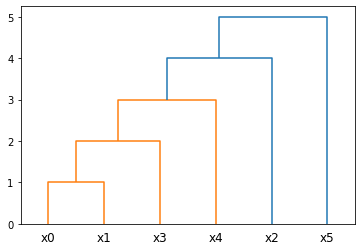

In [15]:
print('3.1 SL+RC\n3.1 result (SL+RC):')
run_AIC(a,dist_RC,single_line)

3.2 FL+SMC
3.2 result (FL+SMC):
0 [[0], [1], [2], [3], [4], [5]]
1 [[0], [1, 3], [2], [4], [5]]
2 [[0, 2], [1, 3], [4], [5]]
3 [[0, 2], [1, 3], [4, 5]]
4 [[0, 2], [1, 3, 4, 5]]
5 [[0, 2, 1, 3, 4, 5]]


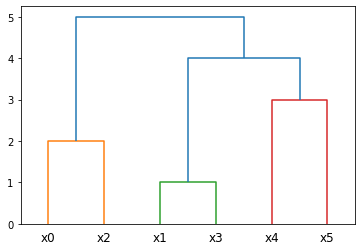

In [16]:
print('3.2 FL+SMC\n3.2 result (FL+SMC):')
run_AIC(a,dist_SMC,full_line)

3.3 ML+JC
3.3 result (ML+JC):
0 [[0], [1], [2], [3], [4], [5]]
1 [[0, 1], [2], [3], [4], [5]]
2 [[0, 1, 4], [2], [3], [5]]
3 [[0, 1, 4, 2], [3], [5]]
4 [[0, 1, 4, 2, 3], [5]]
5 [[0, 1, 4, 2, 3, 5]]


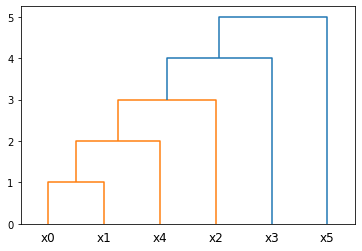

In [17]:
print('3.3 ML+JC\n3.3 result (ML+JC):')
run_AIC(a,dist_JC,middle_line)

 ### Задание 4

In [18]:
ND =[[13,5],[13,6],[14,5],[16,2],[11,3],[10,6],[1,3],[15,2],[2,4],[4,9],[14,3],[13,8],[12,4],[12,6],
    [14,6],[12,7],[4,1],[3,9],[14,1],[17,4],[9,7],[16,1],[2,8],[7,3],[5,4]]
print(' Source points ND:',ND)

 Source points ND: [[13, 5], [13, 6], [14, 5], [16, 2], [11, 3], [10, 6], [1, 3], [15, 2], [2, 4], [4, 9], [14, 3], [13, 8], [12, 4], [12, 6], [14, 6], [12, 7], [4, 1], [3, 9], [14, 1], [17, 4], [9, 7], [16, 1], [2, 8], [7, 3], [5, 4]]


In [19]:
def compute_m1(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m2(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=((abs(x[0]-y[0]))**0.5+(abs(x[1]-y[1]))**0.5)**2
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m3(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=[abs(x[0]-y[0]),abs(x[1]-y[1])]
            distances=max(distances)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m4(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=[abs(x[0]-y[0]),abs(x[1]-y[1])]
            distances=min(distances)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m5(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=np.sqrt((x[0]-y[0])**2+2*(x[1]-y[1])**2)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours
    
def run_DBSCAN(D,minPts,ϵ,compute_m):
    core=[]
    id_cluster={}
    point_neighbours={}
    
    def density_connected(x,k):
        neighbours=point_neighbours.get(x)
        for y in neighbours:
            if id_cluster.get(y)!=k:
                id_cluster[y]=k
                if y in core:
                    density_connected(y,k)    
    
    for i,x in enumerate(D):
        neigh=compute_m(x,D,ϵ)
        amount_neigh = len(neigh)
        point_neighbours[i]=neigh
        id_cluster.setdefault(i,0)
        if amount_neigh>=minPts:
            core.append(i)
    k=0
    for x in core:
        if id_cluster.get(x)==0:
            k=k+1
            id_cluster[x]=k
            density_connected(x,k)
    C=[]
    for i in range (1,k+1):
        Ci=[x  for x in range(len(D)) if id_cluster.get(x)==i]
        C.append(Ci)
    noise=[x for x in range(len(D)) if id_cluster.get(x)==0]
    append_arr= core + noise
    border=[x for x in range(len(D)) if x not in append_arr]
    return C,core,border,noise

In [20]:
def make_plot_with_noise(D,clusters,noise):
    D=np.array(D)
    fig, ax = plt.subplots()
    for index in noise:
        ax.plot(D[index,0],D[index,1],'g*')
        ax.text(D[index,0]+0.1,D[index,1]+0.1,index)
    labels_=[-1]*len(D)
    for i,cluster in enumerate(clusters):
        for index in cluster:
            labels_[index]=i
    labels_=[x for x in labels_ if x !=-1]
    new_D=[]
    for i,x in enumerate(D):
        if i not in noise:
            ax.text(x[0]+0.1,x[1]+0.1,i)
            new_D.append(x)
    new_D=np.array(new_D)
    scatter = ax.scatter(new_D[:,0],new_D[:,1],c=labels_,cmap='rainbow')
    legend = ax.legend(*scatter.legend_elements(fmt='Cluster {x:.0f}'),bbox_to_anchor=(1,0.7))
    ax.add_artist(legend)
    plt.show()

Measure 1 (Norm), ϵ = 3, minPts = 4
Result:
 C: [[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21]]
 O: [0, 1, 2, 3, 5, 7, 10, 11, 12, 13, 14, 15, 18, 21]
 B: [4, 19, 20]
 N: [6, 8, 9, 16, 17, 22, 23, 24]


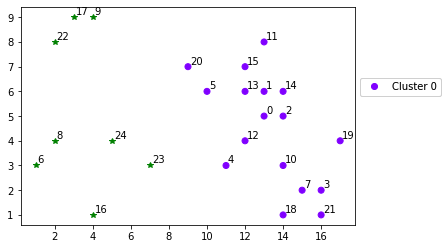

In [21]:
minPts =4 
ϵ = 3
C,core,border,noise = run_DBSCAN(ND,minPts,ϵ,compute_m1)
print(f'Measure 1 (Norm), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

Measure 2 (1/2), ϵ = 4, minPts = 6
Result:
 C: [[0, 1, 2, 5, 10, 11, 12, 13, 14, 15]]
 O: [0, 1, 13, 14]
 B: [2, 5, 10, 11, 12, 15]
 N: [3, 4, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 23, 24]


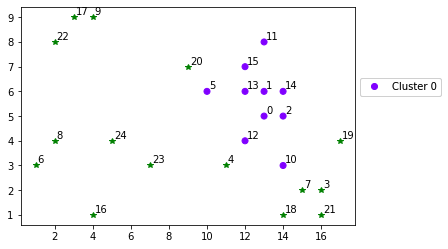

In [22]:
minPts=6
ϵ=4
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m2)
print(f'Measure 2 (1/2), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

Measure 3 (Max), ϵ = 3, minPts = 4
Result:
 C: [[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21], [6, 8, 16, 23, 24]]
 O: [0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]
 B: [6, 8, 23, 24]
 N: [9, 17, 22]


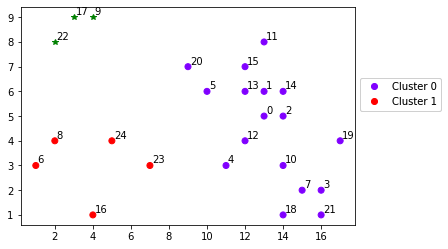

In [23]:
minPts=4
ϵ=3
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m3)
print(f'Measure 3 (Max), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

Measure 4 (Min), ϵ = 2, minPts = 10
Result:
 C: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
 O: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]
 B: [9, 17]
 N: []


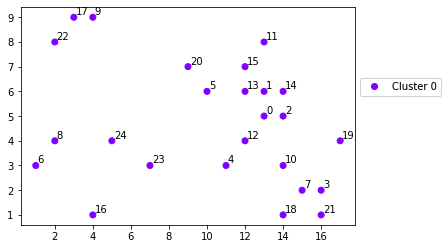

In [24]:
minPts=10
ϵ=2
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m4)
print(f'Measure 4 (Min), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

Measure 5 (Pow), ϵ = 4, minPts = 2
Result:
 C: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 23, 24], [9, 17, 22]]
 O: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24]
 B: [6]
 N: [16]


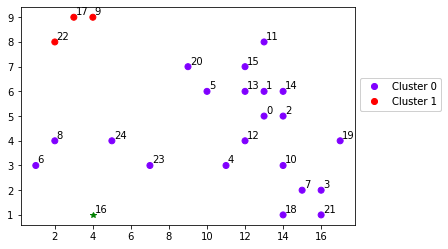

In [25]:
minPts=2
ϵ=4
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m5)
print(f'Measure 5 (Pow), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)